In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.isnull().sum()
df.dropna(axis=1, inplace=True)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Embarked'],
      dtype='object')

In [6]:
df = df.drop(columns = ['Name','Ticket'])
print(df)

     PassengerId  Survived  Pclass     Sex  SibSp  Parch Embarked
0            892         0       3    male      0      0        Q
1            893         1       3  female      1      0        S
2            894         0       2    male      0      0        Q
3            895         0       3    male      0      0        S
4            896         1       3  female      1      1        S
..           ...       ...     ...     ...    ...    ...      ...
413         1305         0       3    male      0      0        S
414         1306         1       1  female      0      0        C
415         1307         0       3    male      0      0        S
416         1308         0       3    male      0      0        S
417         1309         0       3    male      1      1        C

[418 rows x 7 columns]


In [7]:
# male = 1 & female = 0
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [8]:
# C = 0, S = 1, Q = 2
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [9]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,892,0,3,1,0,0,1
1,893,1,3,0,1,0,2
2,894,0,2,1,0,0,1
3,895,0,3,1,0,0,2
4,896,1,3,0,1,1,2
...,...,...,...,...,...,...,...
413,1305,0,3,1,0,0,2
414,1306,1,1,0,0,0,0
415,1307,0,3,1,0,0,2
416,1308,0,3,1,0,0,2


**Splitting the Dataset**

In [10]:
X = df.drop(columns = ['PassengerId', 'Survived'])
Y = df['Survived']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25)

**Model Training**

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [12]:
model.fit(X_train, Y_train)

LogisticRegression()

In [13]:
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  100.0


In [19]:
#finding the number of people survived and not survived
df['Survived'].value_counts()

# 266 male survived
# 152 female survived

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

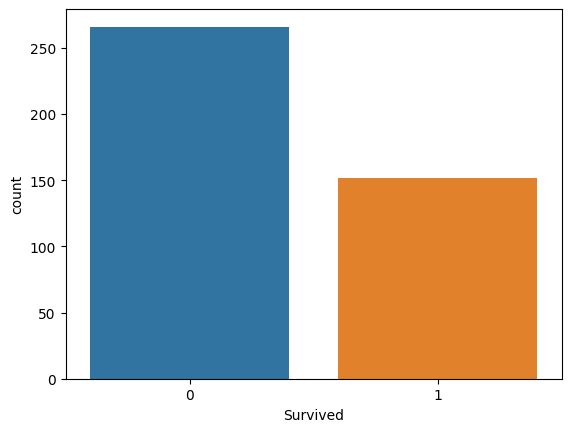

In [20]:
sns.countplot(x='Survived',data=df)